# **Duplicate Question Pairs**

### Group 6:
Darshik Alakkaparambil Somasundaran\
Hamna Ashraf\
Paras Rupani\
Sumit Sumit

## **Problem Statement:**

Duplicate question pair analysis goes beyond simple text matching; it revolves around a more comprehensive approach. Rather than focusing solely on exact text matches, we leverage NLP techniques to consider the underlying meaning and context of questions. This is achieved by utilizing methods like word embeddings and semantic similarity to identify paraphrases and conceptually related text.\
This issue was initially identified by Quora, where users posed similar questions with varying wordings on the same topic. To address this, they sponsored a contest on Kaggle, challenging professionals to identify whether two questions were semantically similar or not.\
This problem is common across multiple platforms, including Reddit, Stack Overflow, and many more. Solving it provides domain expertise in the majority of aspects needed to implement Natural Language Processing. Overall, this project helps us strengthen our skills in the domain of NLP.

## **1. Data collection**

#### **Web scraping**

We gathered questions from [Quora](https://www.quora.com/) by using [Selenium](https://selenium-python.readthedocs.io/) for web scraping. Our focus was on various Quora spaces related to the tech field. We collected data from a total of 19 tech-related Quora spaces. Following are the urls to the spaces we scraped data from:

1) https://androidapps.quora.com/questions
2) https://appleanswers.quora.com/questions
3) https://bigdata.quora.com/questions
4) https://chatgpt5.quora.com/questions
5) https://code.quora.com/questions
6) https://consumercellular.quora.com/questions
7) https://datasciencemustneededskills.quora.com/questions
8) https://googlemeta.quora.com/questions
9) https://iosapps.quora.com/questions
10) https://itjobscareers.quora.com/questions
11) https://jobsfaangfbamzgoogle.quora.com/questions
12) https://learntechnology.quora.com/questions
13) https://machinelearning.quora.com/questions
14) https://qethicalhacking.quora.com/questions
15) https://smartesttech.quora.com/questions
16) https://startupstepbystep.quora.com/questions
17) https://techandtrendslounge.quora.com/questions
18) https://technologicalidea.quora.com/questions
19) https://technologycareers.quora.com/questions

Following notebook link demonstrates the scraping process from multiple URLs or spaces: 
?????

#### **Data annotation - Sentence paraphrasing**

After gathering and combining the scraped data into a single file, we used a paraphraser like ["chatgpt_paraphraser_on_T5_base"](https://huggingface.co/humarin/chatgpt_paraphraser_on_T5_base) from Hugging Face to create different versions of the questions we've collected. This helps in forming pairs of annotated questions. The paraphraser rephrases the original questions with varied wording and structure. For each original question, we generate five duplicate questions. We then pair the first two duplicates with the original question to form similar question pairs. The remaining three duplicates are shuffled to create a set of dissimilar questions. Following is the link to the code: [data-annotate.ipynb](https://github.com/ParasRupani/Duplicate-Sentence-Pairs/blob/main/notebooks/data-annotate.ipynb)

#### **Data Annotation - Sentence pair creation**

Once we've generated paraphrased sentences for each question, we match the first two duplicates with the original question to create similar question pairs. Then, we shuffle the remaining three duplicates to produce a set of dissimilar questions. It's important to note that when shuffling samples to create dissimilar question pairs, there might be instances where two similar questions are mistakenly paired as dissimilar. Similarly, in the similar question set, there could be cases where two dissimilar questions are incorrectly labeled as similar due to ambiguity in the original question. We detect and remove these anomalies from the dataset during the data preprocessing stage. Following link directs to the question pair creation notebook: [sentence-pair.ipynb](https://github.com/ParasRupani/Duplicate-Sentence-Pairs/blob/main/notebooks/sentence-pair_new.ipynb)


#### **Exploratory Data Aanalysis:**

In [17]:
# Import the pandas library with the alias pd for data manipulation
import pandas as pd

# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Import the seaborn library for data visualization
import seaborn as sns

In [18]:
# Read the CSV file "sentence-pairs-cos.csv" into a DataFrame named df
# The file is located in the "pairs" directory and contains cosine similarity scores for sentence pairs
df = pd.read_csv("pairs\sentence-pairs-cos.csv")
df

,idx,q1,q2,labels,cos_sim
0,1271,"""""What is the potential for """"mind control"" me...","In what ways can BCI, which includes AI, facil...",1,0.898457
1,1271,"""""What is the potential for """"mind control"" me...",Where can I find some of the best locations fo...,0,0.019875
2,1271,"""""What is the potential for """"mind control"" me...",What guidance can you offer a smart young pers...,0,0.126389
3,1271,"""""What is the potential for """"mind control"" me...","If BCI, specifically the use of mind control a...",1,0.893072
4,1271,"""""What is the potential for """"mind control"" me...",If I were to travel for 100 days in Pakistan a...,0,0.020048
...,...,...,...,...,...
94728,16104,🤔 Question: Flutter or React Native - which fr...,Would someone be willing to help me access my ...,0,0.016346
94729,16104,🤔 Question: Flutter or React Native - which fr...,"For mobile app development, which framework do...",0,0.968323
94730,16104,🤔 Question: Flutter or React Native - which fr...,The absence of my wife has made me aware that ...,0,0.047606
94731,16104,🤔 Question: Flutter or React Native - which fr...,Flutter vs React Native - which one of these f...,1,0.965005


In [19]:
#make sure there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94733 entries, 0 to 94732
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      94733 non-null  int64  
 1   q1       94733 non-null  object 
 2   q2       94733 non-null  object 
 3   labels   94733 non-null  int64  
 4   cos_sim  94733 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


<Axes: xlabel='labels'>

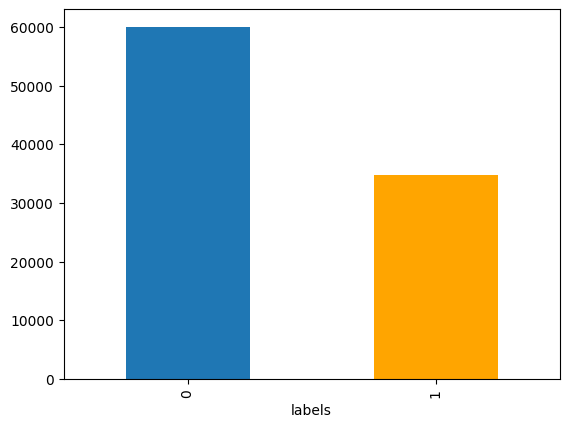

In [20]:
#count of both duplicate and non-duplicate questions
df.groupby("labels")['idx'].count().plot.bar(color=['C0', 'orange'])

We can see in this plot that the non-duplicates are more than duplicate questions in our dataset. As we have more than 30,000 duplicate questions in our dataset, it would be useful when training the model

In [21]:
#checks and prints the count of duplicate and non-duplicate questions.
non_duplicates = df[df['labels'] == 0]
duplicates = df[df['labels'] == 1]

print(f"Non-duplicates: {non_duplicates['idx'].count()}")
print(f"Duplicates: {duplicates['idx'].count()}")

Non-duplicates: 59999
Duplicates: 34734


In [22]:
total = df['idx'].count()

#prints percentage
print(f"Non-duplicates Percent: {round((non_duplicates['idx'].count()/total) * 100 , 2)}%")
print(f"Duplicates Percent: {round((duplicates['idx'].count()/total)*100 , 2)}%")

Non-duplicates Percent: 63.33%
Duplicates Percent: 36.67%


In [23]:
#this checks if there are repeated pair of questions

dup_pairs = df[['q1','q2','labels']].groupby(['q1','q2']).count().reset_index()
print ("Repeated questions:",(dup_pairs).shape[0] - df.shape[0])

Repeated questions: 0


In [ ]:
def total_words(arr):
    word_count = 0

    all_words = ""
    word_list = []

    # Loop through each element in the array
    for item in arr:
        # Split the element into words and add the number of words to the total
        words = item.split(" ")
        word_list.append(words)

        all_words += " ".join(words) + " "  # Concatenate the words into the all_words string
        word_count += len(words)  # Increment word_count by the number of words in the current element
    
    return word_list, all_words, word_count


In [ ]:
dup_words_list, words_in_dup, dup_word_count = total_words(dup_arr)
non_dup_words_list, words_in_non_dup, non_dup_word_count = total_words(non_dup_arr)

print ("Total number of words in duplicate pair questions :", dup_word_count)
print ("Total number of words in non duplicate pair questions :", non_dup_word_count)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Word Cloud for Duplicate Question pairs
wc_dup = WordCloud(background_color="white", max_words=dup_word_count, stopwords=stopwords)
wc_dup.generate(words_in_dup)
axes[0].imshow(wc_dup, interpolation='bilinear')
axes[0].set_title("Word Cloud for Duplicate Question pairs")
axes[0].axis("off")

# Word Cloud for non-Duplicate Question pairs
wc_non_dup = WordCloud(background_color="white", max_words=non_dup_word_count, stopwords=stopwords)
wc_non_dup.generate(words_in_non_dup)
axes[1].imshow(wc_non_dup, interpolation='bilinear')
axes[1].set_title("Word Cloud for non-Duplicate Question pairs")
axes[1].axis("off")

plt.show()

*check word cloud and print percentages and count together*

## **2. Preprocessing**

#### **Removing redundant question pairs**

After annotation, we used cosine similarity on sentence embeddings to check for and get rid of any redundant pairs in the dataset.

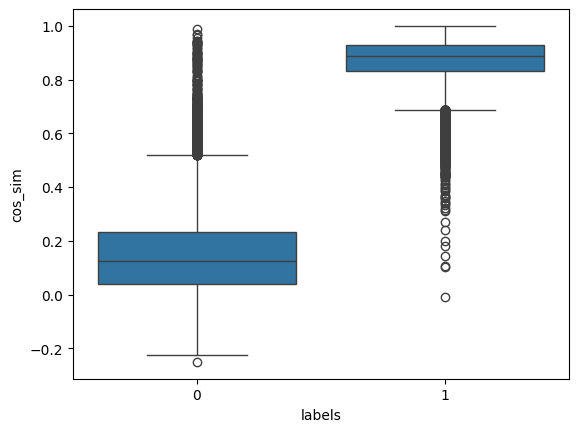

In [24]:
# PLot the cosine similary across class
sns.boxplot(df, x="labels", y="cos_sim")
plt.show()

In [25]:
# Check for redundancy
anomaly_1 = df[(df["labels"] == 1) & (df["cos_sim"] < 0.5)].values
# print(anomaly_1[:2])

* [16001, 'Wat is this show me wat to bo', 'Can you clarify what this means?', 1, 0.2002676874399185],

* [15294, 'Way', 'Way to go, you ask?', 1, 0.383743941783905],

* [15294, 'Way', 'How can we make the most of technology to achieve our goals?', 1, 0.1050063520669937],

* [16130, 'Hej allihop. Min fråga är någon har kontroll på min telefon vad ni rekommendera att göra ska jag köpa spion program eller tack..', '"Hey, I\'m feeling a bit cold. I can\'t seem to get my phone working properly even when I call it."', 1, -0.0103923277929425],

In the set of similar pairs, we noticed that some samples weren't quite alike. This was due to vague sentences, some of which were written in English but expressed ideas from a different language. Others were incomplete and lacked clear meaning.

In [26]:
anomaly_2 = df[(df["labels"] == 0) & (df["cos_sim"] > 0.5)].values
# print(anomaly_2[:2])

* [16104, '🤔 Question: Flutter or React Native - which framework do you prefer for building mobile apps, and why?', 'For mobile app development, which framework do you favor more and why: Flutter or React Native?', 0, 0.9683225154876708],

* [1617, 'Are companies scrambling to hire talent who knows how to implement and harness the rapidly developing generative artificial intelligence technology?', 'How come there is a sudden surge of programmers with little math knowledge branching off into machine learning, which demands distinct skill sets than conventional programming?', 0, 0.5538749694824219],

* [1220, 'Are there any adventure sports or recreational activities available for travelers along the Indus River, such as rafting or kayaking?', 'Seeking recommendations for culturally rich destinations or homestays along the INDUS River route for a 100-day trip.', 0, 0.6983172297477722],


This occurred because when we shuffled the data, a few pairs ended up being matched with duplicates. To solve this, we used cosine similarity to spot duplicate pairs in the set of dissimilar sentences.

In [27]:
df = df[((df["labels"] == 1) & (df["cos_sim"] > 0.5)) | ((df["labels"] == 0) & (df["cos_sim"] < 0.5))].reset_index(drop=True)

To address this, we removed 59 samples with a similarity score below 0.5 from the similar set, even though it meant losing a few correct pairs. We set a threshold so that pairs with a cosine similarity above 0.5 were removed, even though this meant losing a few correct pairs. In total, about 790 out of 65,000 dissimilar pairs were filtered out.

#### **Cleaning text**

For data pre-processing, we need to make sure that our data is clean before our model gets trained on it. \
We need to perform the following tasks:
- Tokenization
- Lowercasing/normalization
- Stopword removal
- POS tagging
- Lemmatization
- Hashtag removal
- Emoji removal

In [28]:
from nltk.tokenize import word_tokenize  # Import word_tokenize for tokenization
from nltk.corpus import stopwords  # Import stopwords for stop word removal
import string  # Import string module for string-related operations
from nltk import pos_tag  # Import pos_tag for part-of-speech tagging
from nltk.corpus import wordnet  # Import wordnet for lemmatization
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer for lemmatization
import re  # Import re module for regular expressions
import emoji  # Import emoji module for handling emojis

In [29]:
def preprocess(data):

    """
    Preprocesses text data by performing tokenization, lowercasing, stopword removal,
    part-of-speech tagging, lemmatization, hashtag removal, emoji removal, special character removal, 
    and extra whitespace removal.
    
    Args:
    - data: Input text data to be preprocessed
    
    Returns:
    - cleaned_text: Preprocessed text data
    """
    
    #1. Tokenization:
    tokenize = word_tokenize(data)

    #2. Lowercasing:
    chars = set(string.punctuation)
    norm_token = [token for token in tokenize if token.lower() not in chars]
    
    #3. Stopwords Removal:
    stop_words = set(stopwords.words('english'))
    new_token = [token for token in norm_token if token.lower() not in stop_words]

    #4. Consider POS tagging 
    pos_tagging = pos_tag(new_token)

    #5. Lemmatization:
    lemmatizor = WordNetLemmatizer()
    token_list = []

    for word, tag in pos_tagging:
        if tag.startswith('N'): #NN,NNS,NNP,NNPS tags
            pos_word = wordnet.NOUN
        elif tag.startswith('V'): #VB, VBD, VBG, VBN, VBP tags
            pos_word = wordnet.VERB
        elif tag.startswith('J'): #JJ, JJR, JJS tags
            pos_word = wordnet.ADJ
        elif tag.startswith('R'): # RB, RBR, RBS tags
            pos_word = wordnet.ADV
        else:
            pos_word = wordnet.NOUN

        lemmatization = lemmatizor.lemmatize(word, pos_word)
        token_list.append(lemmatization)

    
    #6. Remove hashtags:
    text = ' '.join(token_list)
    text_without_hashtags = re.sub(r'\s?#\w+\b', '', text)

    #7. Emoji removal:
    text_without_emojis = emoji.replace_emoji(text_without_hashtags, replace='')
    cleaned_text = re.sub(r'\s+', ' ', text_without_emojis).strip()
    
    # 8. Remove special characters:
    cleaned_text = re.sub(r'[^\w\s]', '', text_without_emojis)
    
    # 9. Remove extra whitespaces:
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text
    

In [30]:
# Create a copy of the dataframe
dfc = df.copy()
dfc["q1"] = dfc["q1"].transform(lambda x: preprocess(str(x)))
dfc["q2"] = dfc["q2"].transform(lambda x: preprocess(str(x)))

In [31]:
dfc["cos_sim"] = dfc["cos_sim"].transform(lambda x: round(x))

## **3. Feature Extraction**

In [32]:
# Importing the English language model from spaCy
import en_core_web_sm

# Importing NumPy library for numerical computations
import numpy as np

# Importing SentenceTransformer library for converting text to fixed-dimensional vectors
from sentence_transformers import SentenceTransformer

# Importing tqdm for displaying progress bars
import tqdm
from tqdm import tqdm

# Importing TfidfVectorizer class from scikit-learn for TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing CountVectorizer class from scikit-learn for word count vectorization
from sklearn.feature_extraction.text import CountVectorizer

### **Bag-of-Words**

**Add description!**

In [33]:
questions = list(dfc['q1']) + list(dfc['q2'])

In [14]:
# Concatenating the questions from columns 'q1' and 'q2' in the DataFrame 'dfc' into a single list
questions = list(dfc['q1']) + list(dfc['q2'])

# Creating a CountVectorizer object with a maximum of 2000 features
cv = CountVectorizer(max_features=2000)

# Transforming the list of questions into a bag-of-words representation and splitting it into two arrays
# Each array corresponds to the bag-of-words representation of questions from 'q1' and 'q2' columns respectively
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

# Concatenating the bag-of-words representations of 'q1' and 'q2' arrays horizontally
# to create a single bag-of-words representation for each pair of questions
bow = np.concatenate([q1_arr, q2_arr], axis=1)

In [15]:
bow.shape

(93559, 4000)

#### **Word embedding**

In [42]:
# merge texts
# Combining the questions from columns 'q1' and 'q2' into a single list
questions = list(dfc['q1']) + list(dfc['q2'])

# Initialize a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Fit the TfidfVectorizer to the combined questions and transform them into a TF-IDF matrix
tfidf.fit_transform(questions)

# Create a dictionary where keys are words and values are their TF-IDF scores
word2tfidf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

In [12]:
# Load English language model
nlp = en_core_web_sm.load()

def calculate_mean_vectors(documents):

    # Initialize an empty list to store the mean vectors
    mean_vectors = []

    # Use tqdm to display a progress bar
    for document in tqdm(documents, desc="Calculating mean vectors"):
        # Process the document using spaCy
        doc = nlp(document)
        
        # Initialize an array to store the word vectors
        word_vectors = []

        # Iterate through each word in the document
        for word in doc:
            # Get the word vector
            vec = word.vector
            
            # Fetch the IDF score for the word
            idf = word2tfidf.get(str(word), 0)
            
            # Multiply the word vector by the IDF score
            weighted_vec = vec * idf
            
            # Append the weighted word vector to the list
            word_vectors.append(weighted_vec)
        
        # Convert the list of word vectors to a numpy array
        word_vectors = np.array(word_vectors)
        
        # Calculate the mean vector for the document
        mean_vec = np.mean(word_vectors, axis=0)
        
        # Append the mean vector to the list of mean vectors
        mean_vectors.append(mean_vec)

    return mean_vectors

In [15]:
mean_vectors_q1 = calculate_mean_vectors(list(dfc['q1']))
mean_vectors_q2 = calculate_mean_vectors(list(dfc['q2']))

Calculating mean vectors: 100%|██████████| 93559/93559 [05:11<00:00, 299.91it/s]


In [43]:
# mean_vectors = np.concatenate([np.array(mean_vectors_q1),np.array(mean_vectors_q1)], axis=1)
# np.save('mean_vectors.npy', mean_vectors) 
mean_vectors = np.load('mean_vectors.npy')

In [44]:
print("Shape of vector: ", mean_vectors[0].shape)

Shape of vector:  (192,)


#### **Contextual embedding**

In [34]:
# List of sentences for which contextual embeddings are to be generated
sentences = [
    "Is there a particular skill that is commonly associated with programming? Can you share your own experiences as to why you have this particular ability?",
    "What aptitude do you believe is necessary for programming, and what specific qualities do they possess?"
]

# Loading a pre-trained SentenceTransformer model for contextual embedding generation
# The 'all-MiniLM-L6-v2' model is being used here
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Encoding the given sentences to obtain contextual embeddings
embeddings = model.encode(sentences)

# Printing the shape of the flattened embeddings array
# This provides information about the dimensions of the embeddings
print(embeddings.flatten().shape)

(768,)


In [22]:
# Initializing empty lists to store embeddings and labels
embeddings_list = []
labels_list = []

# Looping through each row in the DataFrame 'dfc' using tqdm to display a progress bar
for i in tqdm.tqdm(range(len(dfc))):    
    # Accessing the i-th row of the DataFrame
    sentences = dfc.iloc[i]
    
    # Encoding the 'q1' and 'q2' columns of the current row to obtain contextual embeddings using the pre-trained model
    embeddings = model.encode([sentences.q1, sentences.q2])
    
    # Flattening the embeddings and appending them to the embeddings_list
    embeddings_list.append(embeddings.flatten())
    
    # Appending the label of the current row to the labels_list
    labels_list.append(sentences.labels)

100%|██████████| 93559/93559 [09:50<00:00, 158.53it/s]


In [35]:
# np.save('context_emb.npy', embeddings_list) 
embeddings_list = np.load('context_emb.npy')

In [36]:
print("Shape of embeddings: ", embeddings_list[0].shape)

Shape of embeddings:  (768,)


## **4. Model Selection and Training**

In [38]:
# Importing the train_test_split function from scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing the SGDClassifier class from scikit-learn for training a linear classifier using stochastic gradient descent
from sklearn.linear_model import SGDClassifier

# Importing the StandardScaler class from scikit-learn for standardization of features
from sklearn.preprocessing import StandardScaler

# Importing make_pipeline function from scikit-learn for creating a pipeline
from sklearn.pipeline import make_pipeline

# Importing various performance metrics functions from scikit-learn for evaluating classifier performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import random

In [39]:
grp = {q:"A" if i > 12145 else "B" for i, q in enumerate(dfc["q1"].unique())}
dfc["group"] = dfc["q1"].transform(lambda x: grp[x])

In [40]:
dfc[dfc["group"] == "B"].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       81880, 81881, 81882, 81883, 81884, 92165, 92166, 92167, 92168, 92169],
      dtype='int64', length=65417)

#### **Training SGD classifier using bag-of-words representations**

In [127]:
# Splitting the data into training and testing sets using train_test_split function
# X_train, X_test, y_train, y_test = train_test_split(bow, dfc["labels"], test_size=0.3, random_state=42, stratify=dfc["group"])

X_train, X_test, y_train, y_test = bow[dfc[dfc["group"] == "B"].index], bow[dfc[dfc["group"] == "A"].index], dfc[dfc["group"] == "B"]["labels"], dfc[dfc["group"] == "A"]["labels"]

# Print the shapes of the training and testing sets to verify the split
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (65417, 4000) Target: (65417,)
Testing set - Features: (28142, 4000) Target: (28142,)


In [128]:
# Creating a pipeline for logistic regression classifier using make_pipeline function from scikit-learn
# The pipeline consists of two steps:
#   - StandardScaler: Standardizes features by removing the mean and scaling to unit variance
#   - SGDClassifier: Implements linear classifiers using stochastic gradient descent (SGD) learning
#                   max_iter=3000 sets the maximum number of iterations for training
#                   alpha=7.73e-06 sets the regularization parameter
#                   penalty='l2' sets the penalty term to L2 regularization
#                   loss='hinge' specifies the hinge loss function for linear SVM
lg1 = make_pipeline(StandardScaler(), SGDClassifier(max_iter=3000, alpha=7.73e-06, penalty='l2', loss='hinge'))

# Fitting the logistic regression pipeline on the training data
# https://stats.stackexchange.com/questions/385944/facebooks-infersent-intuition
lg1.fit(X_train[:,:2000]*X_train[:,2000:], y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=7.73e-06, max_iter=3000))])

In [129]:
# https://stats.stackexchange.com/questions/385944/facebooks-infersent-intuition
# Predictions on the training set using the trained logistic regression model
y_pred = lg1.predict(X_train[:,:2000]*X_train[:,2000:])

# Calculating evaluation metrics for the model's predictions
accuracy = accuracy_score(y_train, y_pred) # Accuracy
precision = precision_score(y_train, y_pred) # Precision
recall = recall_score(y_train, y_pred) # Recall
f1 = f1_score(y_train, y_pred) # F1 Score
cm = confusion_matrix(y_train, y_pred) # Confusion Matrix

# Printing the evaluation metrics
print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1 Score  :", round(f1, 4))
print("\nConfusion Matrix:\n", cm)

Accuracy  : 0.935
Precision : 0.9197
Recall    : 0.9035
F1 Score  : 0.9115

Confusion Matrix:
 [[39237  1913]
 [ 2342 21925]]


In [130]:
# np.array(embeddings_list)[:,:384] * np.array(embeddings_list)[:,384:], np.array(labels_list)
# https://stats.stackexchange.com/questions/385944/facebooks-infersent-intuition

# Predictions on the test set
y_pred = lg1.predict(X_test[:,:2000]*X_test[:,2000:])

# Calculating evaluation metrics for the model's predictions
accuracy = accuracy_score(y_test, y_pred) # Accuracy
precision = precision_score(y_test, y_pred) # Precision
recall = recall_score(y_test, y_pred) # Recall
f1 = f1_score(y_test, y_pred) # F1 Score
cm = confusion_matrix(y_test, y_pred) # Confusion Matrix

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1 Score  :", round(f1, 4))
print("\nConfusion Matrix:\n", cm)

Accuracy  : 0.9225
Precision : 0.924
Recall    : 0.8607
F1 Score  : 0.8913

Confusion Matrix:
 [[17023   735]
 [ 1446  8938]]


#### **Training SGD classifier using contextual embeddings**

In [41]:
# Splitting the data into training and testing sets using train_test_split function
# X_train, X_test, y_train, y_test = train_test_split(embeddings_list, dfc["labels"], test_size=0.3, random_state=42, stratify=dfc["group"])

X_train, X_test, y_train, y_test = embeddings_list[dfc[dfc["group"] == "B"].index], embeddings_list[dfc[dfc["group"] == "A"].index], dfc[dfc["group"] == "B"]["labels"], dfc[dfc["group"] == "A"]["labels"]


# Print the shapes of the training and testing sets to verify the split
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (65417, 768) Target: (65417,)
Testing set - Features: (28142, 768) Target: (28142,)


We apply an element-wise product on contextual embeddings, which allows the model to capture nuanced similarities and differences between sentences.

In [69]:
lg3 = make_pipeline(SGDClassifier(max_iter=1000, alpha=7.73e-06, penalty='l2', loss='log_loss'))
lg3.fit(X_train[:,:384]*X_train[:,384:], y_train)

Pipeline(steps=[('sgdclassifier',
                 SGDClassifier(alpha=7.73e-06, loss='log_loss'))])

In [71]:
# np.array(embeddings_list)[:,:384] * np.array(embeddings_list)[:,384:], np.array(labels_list)
# https://stats.stackexchange.com/questions/385944/facebooks-infersent-intuition

# Predictions on the test set
y_pred = lg3.predict(X_train[:,:384]*X_train[:,384:])

accuracy = accuracy_score(y_train, y_pred) # Accuracy
precision = precision_score(y_train, y_pred) # Precision
recall = recall_score(y_train, y_pred) # Recall
f1 = f1_score(y_train, y_pred) # F1 Score
cm = confusion_matrix(y_train, y_pred) # Confusion Matrix

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1 Score  :", round(f1, 4))
print("\nConfusion Matrix:\n", cm)

Accuracy  : 0.9893
Precision : 0.9782
Recall    : 0.9931
F1 Score  : 0.9856

Confusion Matrix:
 [[40614   536]
 [  167 24100]]


In [72]:
# np.array(embeddings_list)[:,:384] * np.array(embeddings_list)[:,384:], np.array(labels_list)
# https://stats.stackexchange.com/questions/385944/facebooks-infersent-intuition

# Predictions on the test set
y_pred = lg3.predict(X_test[:,:384]*X_test[:,384:])

accuracy = accuracy_score(y_test, y_pred) # Accuracy
precision = precision_score(y_test, y_pred) # Precision
recall = recall_score(y_test, y_pred) # Recall
f1 = f1_score(y_test, y_pred) # F1 Score
cm = confusion_matrix(y_test, y_pred) # Confusion Matrix

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1 Score  :", round(f1, 4))
print("\nConfusion Matrix:\n", cm)

Accuracy  : 0.9878
Precision : 0.9792
Recall    : 0.988
F1 Score  : 0.9836

Confusion Matrix:
 [[17540   218]
 [  125 10259]]


#### **Training SGD classifier using word embeddings**

In [141]:
# X_train, X_test, y_train, y_test = train_test_split(mean_vectors, dfc["labels"], test_size=0.3, random_state=42, stratify=dfc["group"])

X_train, X_test, y_train, y_test = mean_vectors[dfc[dfc["group"] == "B"].index], mean_vectors[dfc[dfc["group"] == "A"].index], dfc[dfc["group"] == "B"]["labels"], dfc[dfc["group"] == "A"]["labels"]


# Print the shapes of the training and testing sets to verify the split
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (65417, 192) Target: (65417,)
Testing set - Features: (28142, 192) Target: (28142,)


In [142]:
lg2 = make_pipeline(SGDClassifier(max_iter=1000, alpha=7.73e-06, penalty='l2', loss='hinge'))
lg2.fit(X_train, y_train)

Pipeline(steps=[('sgdclassifier', SGDClassifier(alpha=7.73e-06))])

In [143]:
# np.array(embeddings_list)[:,:384] * np.array(embeddings_list)[:,384:], np.array(labels_list)
# https://stats.stackexchange.com/questions/385944/facebooks-infersent-intuition

# Predictions on the test set
y_pred = lg2.predict(X_train)

accuracy = accuracy_score(y_train, y_pred) # Accuracy
precision = precision_score(y_train, y_pred) # Precision
recall = recall_score(y_train, y_pred) # Recall
f1 = f1_score(y_train, y_pred) # F1 Score
cm = confusion_matrix(y_train, y_pred) # Confusion Matrix

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1 Score  :", round(f1, 4))
print("\nConfusion Matrix:\n", cm)

Accuracy  : 0.5486
Precision : 0.3722
Recall    : 0.3156
F1 Score  : 0.3415

Confusion Matrix:
 [[28232 12918]
 [16609  7658]]


In [144]:
# np.array(embeddings_list)[:,:384] * np.array(embeddings_list)[:,384:], np.array(labels_list)
# https://stats.stackexchange.com/questions/385944/facebooks-infersent-intuition

# Predictions on the test set
y_pred = lg2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # Accuracy
precision = precision_score(y_test, y_pred) # Precision
recall = recall_score(y_test, y_pred) # Recall
f1 = f1_score(y_test, y_pred) # F1 Score
cm = confusion_matrix(y_test, y_pred) # Confusion Matrix

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1 Score  :", round(f1, 4))
print("\nConfusion Matrix:\n", cm)

Accuracy  : 0.5442
Precision : 0.368
Recall    : 0.3278
F1 Score  : 0.3467

Confusion Matrix:
 [[11912  5846]
 [ 6980  3404]]


#### **Saving the models**

In [48]:
# Importing the pickle module for serializing Python objects
import pickle

# Saving the trained SGDClassifier models to files using pickle
with open('sgdc_bow.pkl', 'wb') as f:
    pickle.dump(lg1, f)

with open('sgdc_wrd.pkl', 'wb') as f:
    pickle.dump(lg2, f)

with open('sgdc_con.pkl', 'wb') as f:
    pickle.dump(lg3, f)

In [ ]:
### **Performance Metrics:**

We checked the performace of the model based on the following metrics:
- Accuracy
- Precision
- Recall
- F1-score

*How they are important in comparing the performance of models?*

## **5. Deployment and Interface:**

*The streamlit code??*

The interface has been created and deployed using streamlit. The link to the app is here:\
https://duplicate-question-pair-analysis.streamlit.app/ 